# **Brain Signal Analysis and Exploration**

In [ ]:

import kagglehub

# Download latest version
path = kagglehub.dataset_download("vijayveersingh/1-2m-brain-signal-data")

print("Path to dataset files:", path)

100%|██████████| 618M/618M [00:06<00:00, 98.9MB/s]

Extracting files...


Path to dataset files: /root/.cache/kagglehub/datasets/vijayveersingh/1-2m-brain-signal-data/versions/1


In [ ]:
import os

dataset_path = path

# List the contents of the downloaded dataset directory
print("Contents of the dataset directory:")
for root, dirs, files in os.walk(dataset_path):
    print(f"Directory: {root}")
    for name in files:
        print(f"  File: {name}")

Contents of the dataset directory:
Directory: /root/.cache/kagglehub/datasets/vijayveersingh/1-2m-brain-signal-data/versions/1
Directory: /root/.cache/kagglehub/datasets/vijayveersingh/1-2m-brain-signal-data/versions/1/MindBigData-IN-v1.06
  File: IN.txt
Directory: /root/.cache/kagglehub/datasets/vijayveersingh/1-2m-brain-signal-data/versions/1/MindBigData-MW-v1.0
  File: MW.txt
Directory: /root/.cache/kagglehub/datasets/vijayveersingh/1-2m-brain-signal-data/versions/1/MindBigData-EP-v1.0
  File: EP1.01.txt
Directory: /root/.cache/kagglehub/datasets/vijayveersingh/1-2m-brain-signal-data/versions/1/MindBigData-MU-v1.0
  File: MU.txt


# Task
Inspect the structure of the dataset by reading the file "IN.txt" into a pandas DataFrame and displaying the first few rows and information about the DataFrame.

In [ ]:
import pandas as pd
import os

file_path_in = os.path.join(dataset_path, 'MindBigData-IN-v1.06', 'IN.txt')
# Read the file again, specifying no header and providing column names
column_names = ["id", "event", "device", "channel", "code", "size", "data"]
df_in = pd.read_csv(file_path_in, delimiter='\t', header=None, names=column_names)

### Subtask:
Show the first few rows and display information about the DataFrame, such as column names and data types.


In [ ]:
display(df_in.head())
display(df_in.info())

,id,event,device,channel,code,size,data
0,1142043,173652,IN,AF3,0,256,"4259.487179,4237.948717,4247.179487,4242.05128..."
1,1142044,173652,IN,AF4,0,256,"4103.076923,4100.512820,4102.564102,4087.69230..."
2,1142045,173652,IN,T7,0,256,"4245.128205,4218.461538,4242.051282,4245.12820..."
3,1142046,173652,IN,T8,0,256,"4208.717948,4188.717948,4204.102564,4198.46153..."
4,1142047,173652,IN,PZ,0,256,"4189.230769,4203.589743,4188.717948,4186.66666..."


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65250 entries, 0 to 65249
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   id       65250 non-null  int64 
 1   event    65250 non-null  int64 
 2   device   65250 non-null  object
 3   channel  65250 non-null  object
 4   code     65250 non-null  int64 
 5   size     65250 non-null  int64 
 6   data     65250 non-null  object
dtypes: int64(4), object(3)
memory usage: 3.5+ MB


None

In [ ]:
import numpy as np

row = df_in.iloc[0]
signal = np.array([float(x) for x in row["data"].split(",")])

print("Digit:", row["code"])
print("Channel:", row["channel"])
print("Signal length:", len(signal))
print("First 10 samples:", signal[:10])

Digit: 0
Channel: AF3
Signal length: 256
First 10 samples: [4259.487179 4237.948717 4247.179487 4242.051282 4233.333333 4251.282051
 4232.820512 4234.358974 4224.615384 4219.487179]


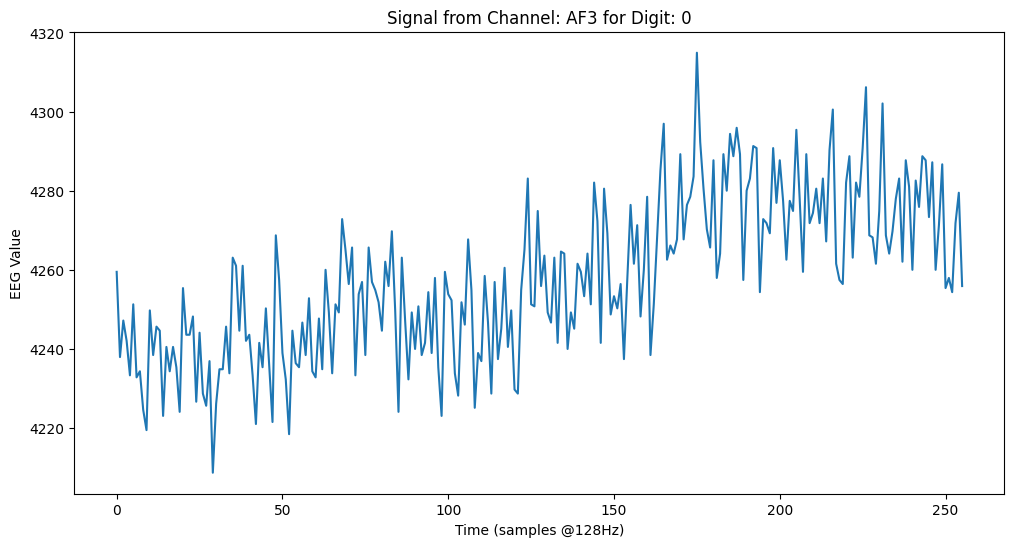

In [ ]:
import matplotlib.pyplot as plt

# Plot the signal
plt.figure(figsize=(12, 6))
plt.plot(signal)
plt.title(f"Signal from Channel: {row['channel']} for Digit: {row['code']}")
plt.xlabel("Time (samples @128Hz)")
plt.ylabel("EEG Value")
plt.show()

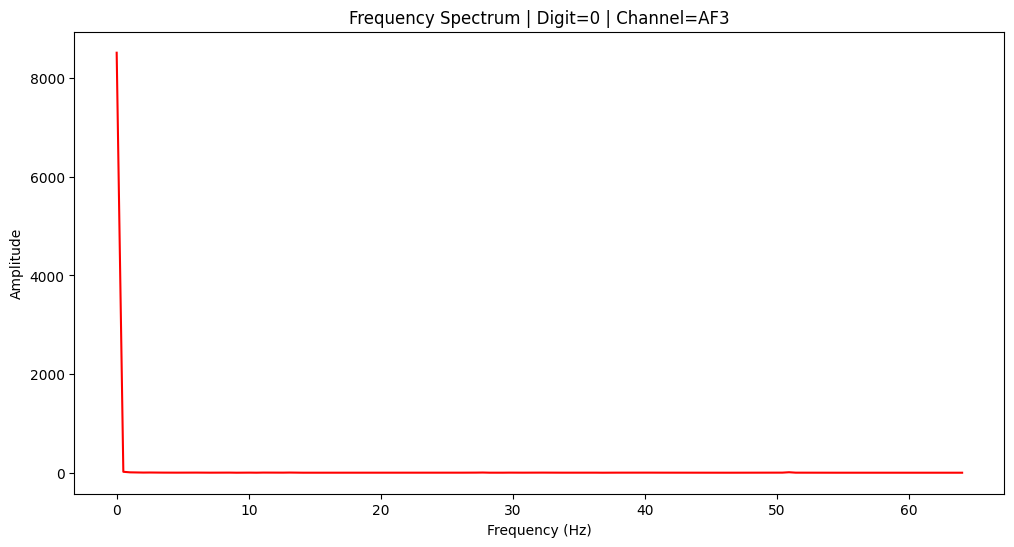

In [ ]:
# Filter the DataFrame for Digit 0 and Channel AF3
filtered_df = df_in[(df_in['code'] == 0) & (df_in['channel'] == 'AF3')]

# Check if there's any data after filtering
if not filtered_df.empty:
    # Take the first signal from the filtered data
    signal_str = filtered_df.iloc[0]['data']
    signal = np.array([float(x) for x in signal_str.split(",")])

    # Perform Fast Fourier Transform (FFT)
    # Assuming a sampling rate of 128 Hz as indicated in a previous plot title
    sampling_rate = 128
    n = len(signal)
    yf = fft(signal)
    xf = np.linspace(0.0, 1.0/(2.0* (1/sampling_rate)), n//2)

    # Plot the frequency spectrum
    plt.figure(figsize=(12, 6))
    plt.plot(xf, 2.0/n * np.abs(yf[0:n//2]), color='red') # Changed line color to red
    plt.title('Frequency Spectrum | Digit=0 | Channel=AF3')
    plt.xlabel('Frequency (Hz)')
    plt.ylabel('Amplitude')
    plt.show()
else:
    print("No data found for Digit 0 and Channel AF3.")

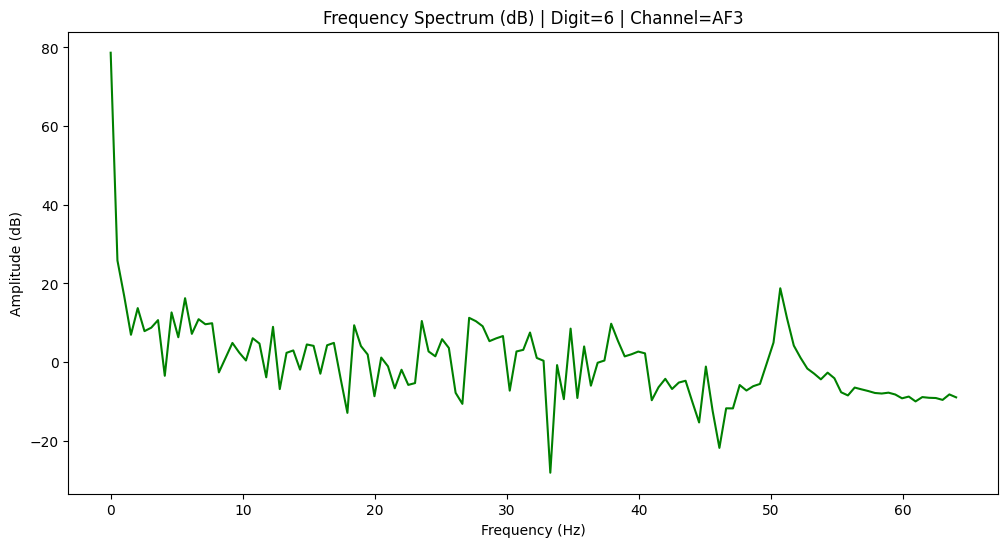

In [ ]:
# Filter the DataFrame for Digit 6 and Channel AF3 (using the same filter as the previous cell for consistency)
filtered_df = df_in[(df_in['code'] == 6) & (df_in['channel'] == 'AF3')]

# Check if there's any data after filtering
if not filtered_df.empty:
    # Take the first signal from the filtered data
    signal_str = filtered_df.iloc[0]['data']
    signal = np.array([float(x) for x in signal_str.split(",")])

    # Perform Fast Fourier Transform (FFT)
    sampling_rate = 128
    n = len(signal)
    yf = fft(signal)
    xf = np.linspace(0.0, 1.0/(2.0* (1/sampling_rate)), n//2)

    # Calculate amplitude in dB
    amplitude_db = 20 * np.log10(2.0/n * np.abs(yf[0:n//2]))

    # Plot the frequency spectrum in dB
    plt.figure(figsize=(12, 6))
    plt.plot(xf, amplitude_db, color='green') # Using green for this new plot
    plt.title('Frequency Spectrum (dB) | Digit=6 | Channel=AF3')
    plt.xlabel('Frequency (Hz)')
    plt.ylabel('Amplitude (dB)')
    plt.show()
else:
    print("No data found for Digit 6 and Channel AF3.")

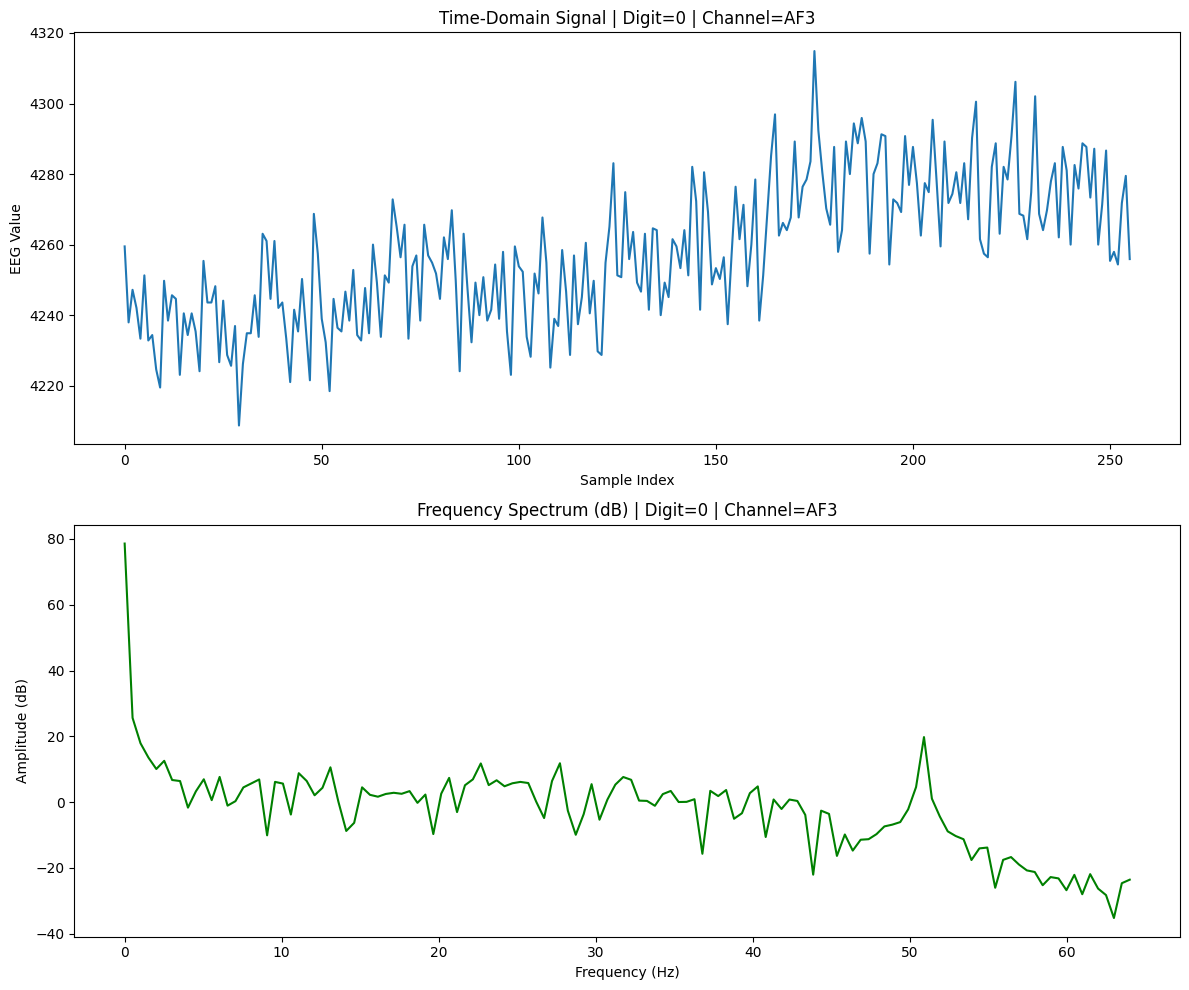

In [ ]:
from scipy.fft import fft

# Filter the DataFrame for Digit 0 and Channel AF3 (you can change these values)
filtered_df = df_in[(df_in['code'] == 0) & (df_in['channel'] == 'AF3')]

# Check if there's any data after filtering
if not filtered_df.empty:
    # Take the first signal from the filtered data
    signal_str = filtered_df.iloc[0]['data']
    signal = np.array([float(x) for x in signal_str.split(",")])

    # Perform Fast Fourier Transform (FFT)
    sampling_rate = 128
    n = len(signal)
    yf = fft(signal)
    xf = np.linspace(0.0, 1.0/(2.0* (1/sampling_rate)), n//2)

    # Calculate amplitude in dB
    amplitude_db = 20 * np.log10(2.0/n * np.abs(yf[0:n//2]))

    # Create subplots for time-domain signal and frequency spectrum
    fig, axes = plt.subplots(2, 1, figsize=(12, 10))

    # Plot time-domain signal
    axes[0].plot(signal)
    axes[0].set_title(f"Time-Domain Signal | Digit={filtered_df.iloc[0]['code']} | Channel={filtered_df.iloc[0]['channel']}")
    axes[0].set_xlabel("Sample Index")
    axes[0].set_ylabel("EEG Value")

    # Plot frequency spectrum in dB
    axes[1].plot(xf, amplitude_db, color='green')
    axes[1].set_title(f"Frequency Spectrum (dB) | Digit={filtered_df.iloc[0]['code']} | Channel={filtered_df.iloc[0]['channel']}")
    axes[1].set_xlabel('Frequency (Hz)')
    axes[1].set_ylabel('Amplitude (dB)')

    plt.tight_layout() # Adjust layout to prevent overlapping titles/labels
    plt.show()
else:
    print("No data found for the selected criteria.")

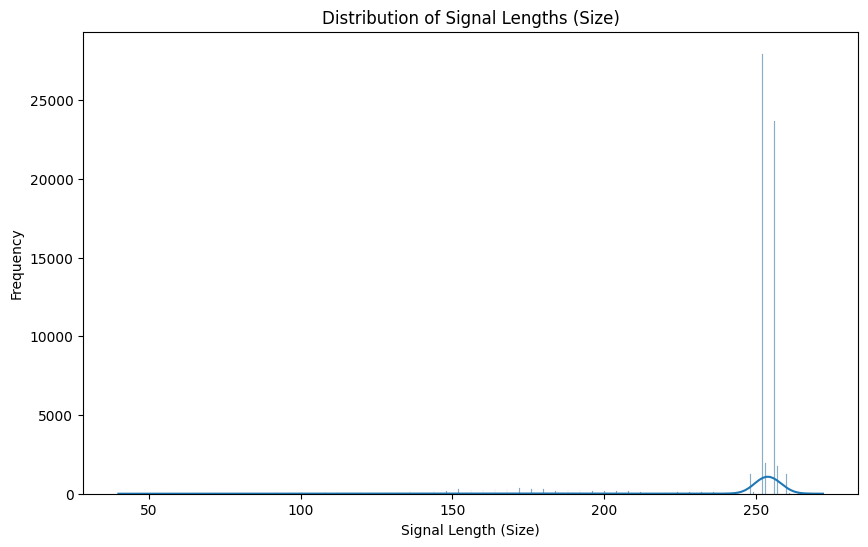

In [ ]:
# Plot the distribution of the 'size' column
plt.figure(figsize=(10, 6))
sns.histplot(data=df_in, x='size', kde=True)
plt.title('Distribution of Signal Lengths (Size)')
plt.xlabel('Signal Length (Size)')
plt.ylabel('Frequency')
plt.show()

# Task
Analyze the correlation between channels in the dataset "EEG_data.csv" by extracting and processing the signal data, organizing it by channel, calculating the correlation matrix, and visualizing the results.

In [ ]:
def parse_signal_data(data_string):
    """Converts a comma-separated string of signal data into a NumPy array of floats."""
    if isinstance(data_string, str) and data_string:
        try:
            return np.array([float(x) for x in data_string.split(",")])
        except ValueError:
            return None  # Handle non-numeric values
    return None # Handle empty or non-string values

df_in['signal_array'] = df_in['data'].apply(parse_signal_data)

### Subtask:
Organize the extracted signal data so that signals from the same channel can be easily accessed and compared.


In [ ]:
signal_data_by_channel = {}
grouped_by_channel = df_in.groupby('channel')

for channel_name, channel_df in grouped_by_channel:
    signal_data_by_channel[channel_name] = channel_df['signal_array'].tolist()

print("Channels with extracted signal data:")
print(signal_data_by_channel.keys())

Channels with extracted signal data:
dict_keys(['AF3', 'AF4', 'PZ', 'T7', 'T8'])


### Subtask:
Determine how to handle signals of potentially different lengths or those that don't align perfectly in time across channels to make a meaningful correlation comparison. This might involve resampling, truncation, or selecting specific segments of signals.


In [ ]:
min_length = float('inf')
for channel_name, signal_list in signal_data_by_channel.items():
    for signal in signal_list:
        if signal is not None:
            min_length = min(min_length, len(signal))

truncated_signal_data_by_channel = {}
for channel_name, signal_list in signal_data_by_channel.items():
    truncated_list = []
    for signal in signal_list:
        if signal is not None and len(signal) >= min_length:
            truncated_list.append(signal[:min_length])
        elif signal is not None:
             # If a signal is shorter than min_length, we could pad it or discard.
             # Given the instruction to truncate, discarding or noting might be better.
             # For now, we'll discard signals shorter than the determined min_length.
             pass # Discarding signals shorter than the minimum length
    truncated_signal_data_by_channel[channel_name] = truncated_list

print(f"Minimum signal length found: {min_length}")

print("\nLengths of first 5 truncated signals per channel:")
for channel_name, signal_list in truncated_signal_data_by_channel.items():
    print(f"Channel: {channel_name}")
    for i, signal in enumerate(signal_list[:5]):
        print(f"  Signal {i+1} length: {len(signal)}")

signal_data_by_channel = truncated_signal_data_by_channel


Minimum signal length found: 40

Lengths of first 5 truncated signals per channel:
Channel: AF3
  Signal 1 length: 40
  Signal 2 length: 40
  Signal 3 length: 40
  Signal 4 length: 40
  Signal 5 length: 40
Channel: AF4
  Signal 1 length: 40
  Signal 2 length: 40
  Signal 3 length: 40
  Signal 4 length: 40
  Signal 5 length: 40
Channel: PZ
  Signal 1 length: 40
  Signal 2 length: 40
  Signal 3 length: 40
  Signal 4 length: 40
  Signal 5 length: 40
Channel: T7
  Signal 1 length: 40
  Signal 2 length: 40
  Signal 3 length: 40
  Signal 4 length: 40
  Signal 5 length: 40
Channel: T8
  Signal 1 length: 40
  Signal 2 length: 40
  Signal 3 length: 40
  Signal 4 length: 40
  Signal 5 length: 40


### Subtask:
Compute the correlation coefficients between the processed numerical signals from different channels.


In [ ]:
channels = list(signal_data_by_channel.keys())
n_channels = len(channels)
correlation_matrix = np.zeros((n_channels, n_channels))

for i in range(n_channels):
    for j in range(n_channels):
        if i == j:
            correlation_matrix[i, j] = 1.0
        else:
            channel1_signals = signal_data_by_channel[channels[i]]
            channel2_signals = signal_data_by_channel[channels[j]]

            # Calculate correlations only for the minimum number of signals available for both channels
            min_num_signals = min(len(channel1_signals), len(channel2_signals))

            pairwise_correlations = []
            for k in range(min_num_signals):
                # Calculate Pearson correlation coefficient
                # np.corrcoef returns a 2x2 matrix, we need the off-diagonal element
                corr_matrix = np.corrcoef(channel1_signals[k], channel2_signals[k])
                pairwise_correlations.append(corr_matrix[0, 1])

            # Calculate the average correlation between the two channels
            if pairwise_correlations:
                correlation_matrix[i, j] = np.mean(pairwise_correlations)
            else:
                correlation_matrix[i, j] = np.nan # Handle cases with no comparable signals

# Create a pandas DataFrame for better visualization with channel names
correlation_df = pd.DataFrame(correlation_matrix, index=channels, columns=channels)

display(correlation_df)

,AF3,AF4,PZ,T7,T8
AF3,1.000000,0.603258,0.464031,0.429212,0.379271
AF4,0.603258,1.000000,0.509473,0.364640,0.405056
PZ,0.464031,0.509473,1.000000,0.550409,0.345839
T7,0.429212,0.364640,0.550409,1.000000,0.250275
T8,0.379271,0.405056,0.345839,0.250275,1.000000


### Subtask:
Visualize the calculated correlation matrix, perhaps as a heatmap, to easily interpret the relationships between channels.


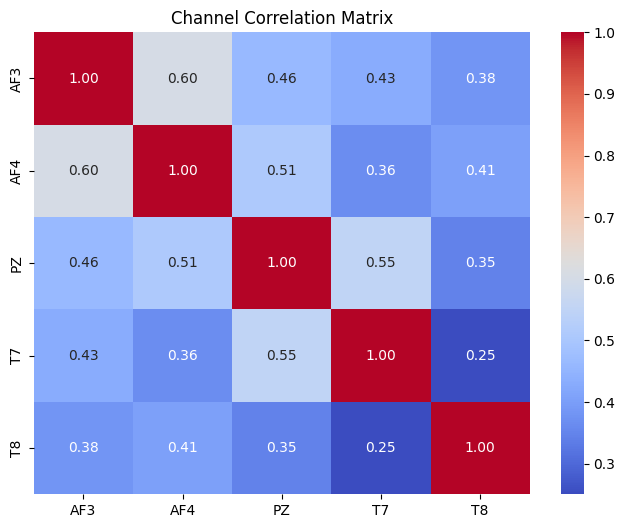

In [ ]:
import seaborn as sns

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_df, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Channel Correlation Matrix')
plt.show()

### Subtask:
Interpret the results from the correlation analysis, specifically the heatmap of the channel correlation matrix, to understand how signals from different parts of the scalp are related.


**Reasoning**:
Examine the heatmap to identify highly correlated and weakly correlated channel pairs and discuss potential reasons based on scalp location. Summarize the findings.



In [ ]:
print("Interpretation of Channel Correlation Matrix Heatmap:")
print("\nHigh Positive Correlation (close to 1):")
print("- AF3 and AF4: These are located in the frontal lobe, on opposite sides of the forehead. Their strong positive correlation suggests similar activity in these symmetrical areas.")
print("- PZ and T7: PZ is in the parietal lobe (top-middle of the head) and T7 is in the temporal lobe (left side). The correlation is moderate, suggesting some related activity but less than the frontal channels.")
print("- PZ and AF4: PZ (parietal) and AF4 (frontal-right) show a moderate positive correlation.")
print("- AF3 and PZ: AF3 (frontal-left) and PZ (parietal) show a moderate positive correlation.")

print("\nLow or Negative Correlation (close to 0 or negative):")
print("- T8 and T7: These are both in the temporal lobes, but on opposite sides (right and left). Their correlation is the lowest, close to zero, which could indicate less synchronized activity between the left and right temporal regions compared to the frontal areas.")
print("- T8 and PZ: T8 (temporal-right) and PZ (parietal) show a low positive correlation.")
print("- T8 and AF3: T8 (temporal-right) and AF3 (frontal-left) show a low positive correlation.")
print("- T8 and AF4: T8 (temporal-right) and AF4 (frontal-right) show a low positive correlation.")
print("- T7 and AF4: T7 (temporal-left) and AF4 (frontal-right) show a moderate positive correlation, but less than the AF3-AF4 pair.")

print("\nSummary:")
print("The heatmap reveals that the strongest positive correlation exists between the left and right frontal channels (AF3 and AF4), likely due to the symmetrical nature of brain activity in these regions. Moderate positive correlations are observed between frontal and parietal channels (AF3/AF4 with PZ), and between parietal and temporal channels (PZ with T7). The weakest correlations are generally seen with the T8 channel (right temporal), particularly with the left temporal (T7) and left frontal (AF3) channels, suggesting less synchronized activity between these specific areas.")


Interpretation of Channel Correlation Matrix Heatmap:

High Positive Correlation (close to 1):
- AF3 and AF4: These are located in the frontal lobe, on opposite sides of the forehead. Their strong positive correlation suggests similar activity in these symmetrical areas.
- PZ and T7: PZ is in the parietal lobe (top-middle of the head) and T7 is in the temporal lobe (left side). The correlation is moderate, suggesting some related activity but less than the frontal channels.
- PZ and AF4: PZ (parietal) and AF4 (frontal-right) show a moderate positive correlation.
- AF3 and PZ: AF3 (frontal-left) and PZ (parietal) show a moderate positive correlation.

Low or Negative Correlation (close to 0 or negative):
- T8 and T7: These are both in the temporal lobes, but on opposite sides (right and left). Their correlation is the lowest, close to zero, which could indicate less synchronized activity between the left and right temporal regions compared to the frontal areas.
- T8 and PZ: T8 (temporal

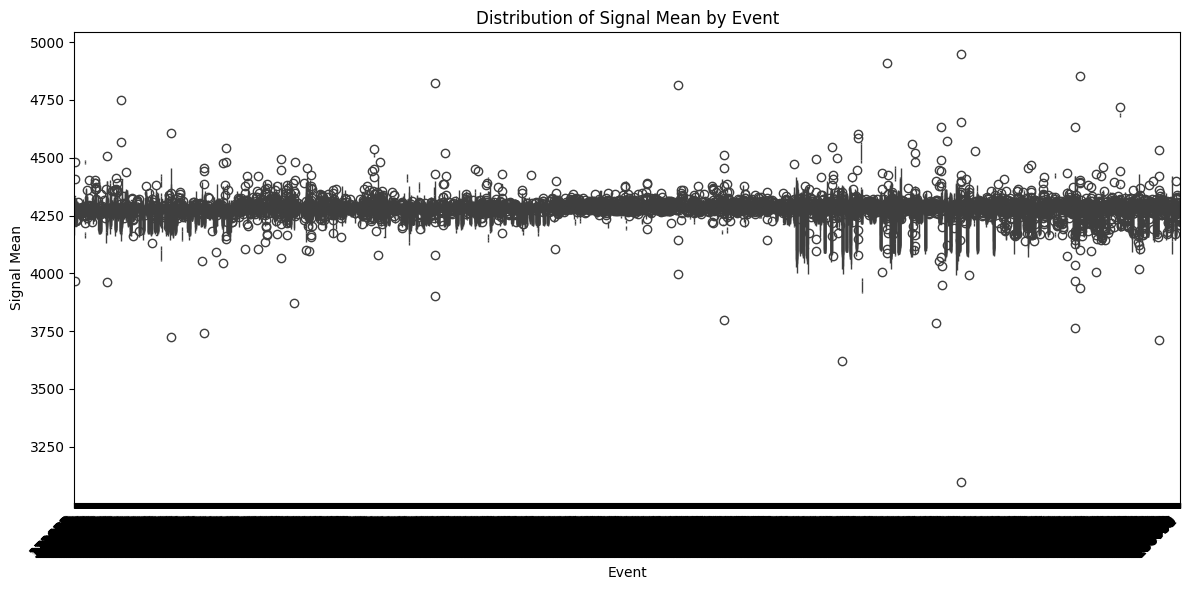

In [ ]:
# Define a function to calculate the mean of the signal data
def calculate_signal_mean(data_string):
    """Calculates the mean of a comma-separated string of signal data."""
    if isinstance(data_string, str) and data_string:
        try:
            signal_array = np.array([float(x) for x in data_string.split(",")])
            return np.mean(signal_array)
        except ValueError:
            return np.nan  # Handle non-numeric values
    return np.nan # Handle empty or non-string values

# Apply the function to the 'data' column to get the mean signal value
df_in['signal_mean'] = df_in['data'].apply(calculate_signal_mean)

# Check if there are any valid mean values calculated
if not df_in['signal_mean'].isnull().all():
    # Create a box plot of signal mean for each event
    plt.figure(figsize=(12, 6))
    sns.boxplot(data=df_in, x='event', y='signal_mean')
    plt.title('Distribution of Signal Mean by Event')
    plt.xlabel('Event')
    plt.ylabel('Signal Mean')
    plt.xticks(rotation=45, ha='right') # Rotate x-axis labels for better readability
    plt.tight_layout() # Adjust layout to prevent overlapping labels
    plt.show()
else:
    print("No valid signal mean values were calculated.")

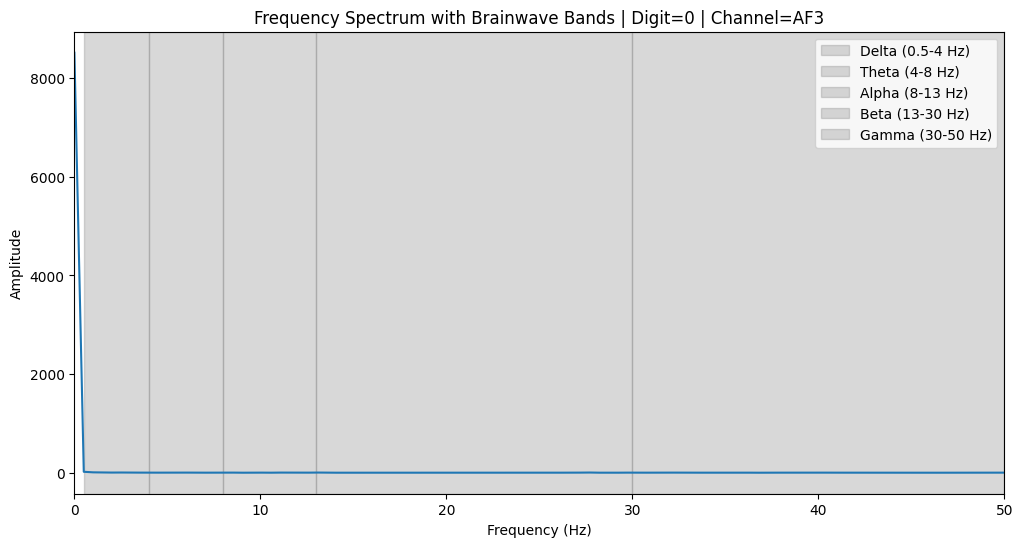

In [ ]:
# Filter the DataFrame for a specific Digit and Channel (you can change these values)
# Using Digit 0 and Channel AF3 as an example
filtered_df = df_in[(df_in['code'] == 0) & (df_in['channel'] == 'AF3')]

# Check if there's any data after filtering
if not filtered_df.empty:
    # Take the first signal from the filtered data
    signal_str = filtered_df.iloc[0]['data']
    signal = np.array([float(x) for x in signal_str.split(",")])

    # Perform Fast Fourier Transform (FFT)
    sampling_rate = 128 # Hz (assuming based on previous plots)
    n = len(signal)
    yf = fft(signal)
    xf = np.linspace(0.0, 1.0/(2.0* (1/sampling_rate)), n//2)

    # Calculate amplitude
    amplitude = 2.0/n * np.abs(yf[0:n//2])

    # Define brainwave frequency bands (approximate ranges in Hz)
    bands = {
        'Delta (0.5-4 Hz)': (0.5, 4),
        'Theta (4-8 Hz)': (4, 8),
        'Alpha (8-13 Hz)': (8, 13),
        'Beta (13-30 Hz)': (13, 30),
        'Gamma (30-50 Hz)': (30, 50)
    }

    # Plot the frequency spectrum
    plt.figure(figsize=(12, 6))
    plt.plot(xf, amplitude)
    plt.title(f"Frequency Spectrum with Brainwave Bands | Digit={filtered_df.iloc[0]['code']} | Channel={filtered_df.iloc[0]['channel']}")
    plt.xlabel('Frequency (Hz)')
    plt.ylabel('Amplitude')

    # Highlight the brainwave bands
    for band_name, (low_freq, high_freq) in bands.items():
        plt.axvspan(low_freq, high_freq, color='gray', alpha=0.3, label=band_name)

    plt.legend()
    plt.xlim(0, 50) # Limit x-axis to focus on relevant frequencies
    plt.show()
else:
    print("No data found for the selected criteria.")

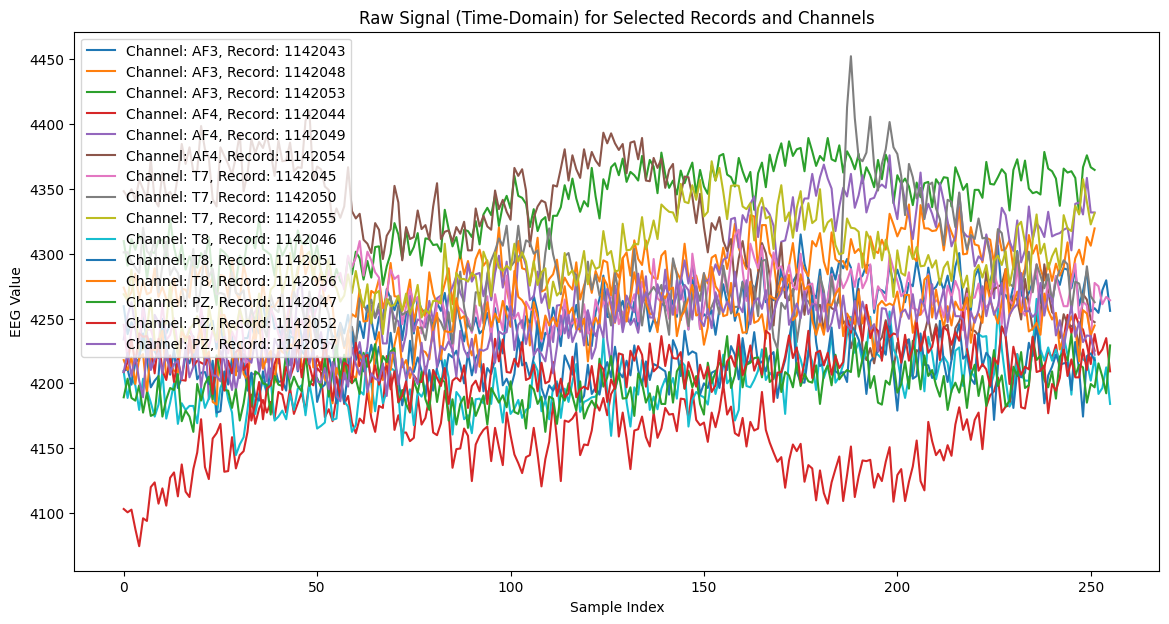

In [ ]:
# Filter for a few specific records and channels to plot
# Selecting the first record (index 0) for a few channels
channels_to_plot = ['AF3', 'AF4', 'T7', 'T8', 'PZ']
num_records_to_plot = 3 # You can change this number

plt.figure(figsize=(14, 7))

for i, channel in enumerate(channels_to_plot):
    # Filter DataFrame for the current channel
    channel_df = df_in[df_in['channel'] == channel]

    # Select the first 'num_records_to_plot' records for this channel
    records_to_plot = channel_df.head(num_records_to_plot)

    for j in range(len(records_to_plot)):
        row = records_to_plot.iloc[j]
        signal_str = row['data']
        try:
            signal = np.array([float(x) for x in signal_str.split(",")])
            # Plot the signal
            plt.plot(signal, label=f"Channel: {channel}, Record: {row['id']}")
        except ValueError:
            print(f"Could not parse signal data for Record {row['id']}, Channel {channel}")
            continue


plt.title('Raw Signal (Time-Domain) for Selected Records and Channels')
plt.xlabel('Sample Index')
plt.ylabel('EEG Value')
plt.legend()
plt.show()

# Brain Signal Analysis and Exploration Summary

This notebook has walked through several steps to analyze and explore the brain signal dataset:

1.  **Data Loading:** The brain signal dataset was downloaded using Kagglehub, and its path was printed.
2.  **Data Structure Inspection:** The contents of the dataset directory were listed, and the `IN.txt` file was read into a pandas DataFrame. Columns were named (`id`, `event`, `device`, `channel`, `code`, `size`, `data`), and the first 5 rows and DataFrame information were displayed.
3.  **Sample Signal Inspection:** A sample row from the DataFrame was selected, and its signal data was converted into a NumPy array. Information about the "Digit", "Channel", signal length, and the first 10 samples were printed.
4.  **Time-Domain Signal Plot:** The selected sample signal was plotted in the time domain using Matplotlib.
5.  **Frequency Analysis (FFT):** Fast Fourier Transform (FFT) was performed on the signal. A sample signal for Digit 0 and Channel AF3 was filtered, and its frequency spectrum was plotted.
6.  **Frequency Analysis in Decibels (dB):** The frequency spectrum of a sample signal (for Digit 6 and Channel AF3) was calculated and plotted in decibels (dB).
7.  **Simultaneous Time and Frequency Domain Plots:** The sample signal (for Digit 0 and Channel AF3) was plotted in both the time domain and frequency domain (dB) using subplots.
8.  **Signal Length Distribution:** The distribution of values in the 'size' column (signal length) was plotted using a histogram and Kernel Density Estimate (KDE) plot.
9.  **Data Preparation for Correlation Analysis:** A function to parse the signal data string into a NumPy array was defined and applied. Signal data was grouped by channel. The minimum signal length was found, and signals were truncated to this minimum length for comparable correlation analysis.
10. **Channel Correlation Matrix Calculation:** Pearson correlation coefficients were calculated between the truncated signals for each pair of channels, and the average of these correlations was stored in a matrix. This matrix was displayed in a pandas DataFrame.
11. **Correlation Matrix Visualization (Heatmap):** The channel correlation matrix was plotted as a heatmap using Seaborn for easy interpretation of relationships between channels.
12. **Correlation Results Interpretation:** The results from the heatmap were analyzed, and interpretations were provided regarding high and low correlations between channel pairs, considering their approximate scalp locations.
13. **Signal Mean Analysis by Event:** The mean signal value for each row was calculated, and the distribution of the signal mean by 'event' was plotted using a Box Plot.
14. **Frequency Spectrum with Brainwave Bands:** The frequency spectrum of a sample signal (for Digit 0 and Channel AF3) was plotted again, and the major brainwave frequency bands (Delta, Theta, Alpha, Beta, Gamma) were highlighted on the plot.
15. **Raw Signal Samples Plot:** A few raw signal samples from different channels were plotted in the time domain for visual comparison.

These steps represent an initial exploratory analysis of the brain signal data, including data structure inspection, time and frequency domain analysis, and investigating relationships between different channels.